In [23]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
from datetime import date

In [24]:
DIR_DATA='data'
today = date.today().strftime("%d/%m/%Y")

In [25]:
#load all variables/observations
df_data=[]
for filename in os.listdir(DIR_DATA):
    f = os.path.join(DIR_DATA, filename)
    # checking if it is a file
    if os.path.isfile(f):
        if f.endswith('csv'):
            df_data.append(pd.read_csv(f))

In [26]:
#list of parties
cols=list(df_data[0].columns)
cols.remove('DATE')
#remove
parties_rm=['PC']
for p in parties_rm:
    cols.remove(p)

In [27]:
#collect means of variables
try:
    del df_svd
except:
    pass
df_svd = pd.DataFrame(columns = cols)
for idf,df in enumerate(df_data):
    df_svd.loc[idf]=df[cols].mean()

In [28]:
#normalize means to max
dfMax = df_svd.max(axis=1)
df_svd=df_svd.divide(dfMax,axis=0)

In [7]:
df_svd

,VICTORIA,VIVA,SEMILLA,CAMBIO,CABAL,AZUL,UNE,BIEN,FCN-NACION,VALOR-UNIONISTA,...,VAMOS,ELEFANTE,PHG,NOSOTROS,MI-FAMILIA,UR,VOS,URNG-WINAQ,PIN,REPUBLICANO
0,0.120256,0.153137,0.099954,0.004285,1.000000,0.034642,0.299895,0.078532,0.308824,0.644927,...,NaN,NaN,NaN,0.066511,0.017900,0.049691,0.122314,0.011022,0.072642,0.038256
1,NaN,NaN,NaN,NaN,0.637555,NaN,0.781659,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.093023,0.093023,NaN,NaN,0.720930,NaN,1.000000,NaN,NaN,0.930233,...,0.186047,NaN,NaN,NaN,NaN,NaN,0.093023,NaN,NaN,0.093023
3,NaN,NaN,NaN,0.222222,1.000000,NaN,0.522222,NaN,NaN,0.848148,...,0.366667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.059940,0.017982,0.036464,0.018482,0.397103,0.060939,1.000000,0.025974,0.015984,0.500999,...,0.144855,0.009990,0.013986,0.022478,0.025475,0.035964,0.076923,0.046953,0.013487,0.049950
5,NaN,NaN,NaN,NaN,0.789203,NaN,0.848329,NaN,NaN,1.000000,...,0.318766,NaN,NaN,NaN,NaN,NaN,0.352185,NaN,NaN,NaN
6,0.122018,0.112338,0.112338,NaN,0.257997,0.031612,1.000000,NaN,NaN,0.314051,...,NaN,NaN,NaN,0.067315,0.086112,0.113474,0.152767,NaN,0.072326,0.123058
7,0.851063,0.118202,0.389730,0.001881,1.000000,0.005496,0.737174,0.156521,0.116101,0.202723,...,NaN,NaN,NaN,0.021863,0.013937,0.048252,0.327073,0.008357,0.067212,0.004978
8,0.653351,0.116359,0.028355,0.011067,0.587067,0.036162,0.930072,NaN,NaN,1.000000,...,0.022312,NaN,0.009061,0.167304,0.026929,0.039684,0.377296,NaN,0.005399,0.051645
9,0.174359,NaN,NaN,NaN,0.517949,NaN,1.000000,0.097436,0.112821,0.471795,...,0.256410,NaN,NaN,NaN,NaN,NaN,0.158974,NaN,NaN,NaN


In [29]:
#Mulitple Imputation
try:
    del df_svdm
except:
    pass
df_svdm=df_svd.copy()
#Simple Imputation
try:
    del df_svds
except:
    pass
df_svds=df_svd.copy()

In [30]:
#Multiple Imputation
try:
    del df_mi
except:
    pass
df_mi=pd.DataFrame(columns=cols)
try:
    del df_li
except:
    pass
df_li=pd.DataFrame(columns=cols)

for i in range(50):
    try:
        del df_temp
    except:
        pass
    df_temp=df_svdm.copy()
    for party in cols:
        #for index, item in df_svdm[party].iteritems(): pandas version
        for index, item in df_svdm[party].items():
            if math.isnan(df_svdm[party].std()):
                rand=df_svdm[party].mean()
            else:
                #rand=np.random.normal(df_svdm[party].mean(), df_svdm[party].std(), 1)[0] #normal
                rand=np.random.uniform(df_svdm[party].min(), df_svdm[party].max()) #uniform
                #rand=np.random.poisson(df_svdm[party].mean(), 1)[0] #poisson
            while rand <0:
                #rand=np.random.normal(df_svdm[party].mean(), df_svdm[party].std(), 1)[0] #normal
                rand=np.random.uniform(df_svdm[party].min(), df_svdm[party].max()) #uniform
                #rand=np.random.poisson(df_svdm[party].mean(), 1)[0] #poisson
            df_temp[party].iloc[index]=rand
    u, s, v = np.linalg.svd(df_temp, full_matrices=False)
    #lower frequency(pca1)
    df_comp=pd.DataFrame(np.matrix(u[:1, :1]) * np.diag(s[:1]) * np.matrix(v[:1, :]))
    df_comp.columns=cols
    #print(df_comp.std().sum())
    temp_s=df_comp.sum(axis=1)[0]
    #df_mi=df_mi.append(df_comp.div(df_comp.sum(axis=1), axis=0).mean(),ignore_index=True) pandas version
    df_mi = pd.concat([df_mi, pd.DataFrame([df_comp.div(df_comp.sum(axis=1), axis=0).mean()])], ignore_index=True)
    #high frequency(apca1)
    df_comp=pd.DataFrame(np.matrix(u[1:, 1:]) * np.diag(s[1:]) * np.matrix(v[1:, :]))
    df_comp.columns=cols
    #df_li=df_li.append(df_comp.div(df_comp.sum(axis=1), axis=0).mean(),ignore_index=True) pandas version
    #df_li = pd.concat([df_li, pd.DataFrame([df_comp.div(df_comp.abs().sum(axis=1), axis=0).mean()])], ignore_index=True)
    #df_li = pd.concat([df_li, pd.DataFrame([df_comp.div(temp_s).mean()])], ignore_index=True)#scale from before, mean
    #df_li = pd.concat([df_li, pd.DataFrame([df_comp.div(temp_s).pow(2).sum()])], ignore_index=True)#scale from before, sum of squares
    #df_li = pd.concat([df_li, pd.DataFrame([np.sqrt(df_comp.div(temp_s).pow(2).sum())])], ignore_index=True)#scale from before, square root sum of squares
    df_li = pd.concat([df_li, pd.DataFrame([np.sqrt(df_comp.div(temp_s).pow(2).mean())])], ignore_index=True)#scale from before, std

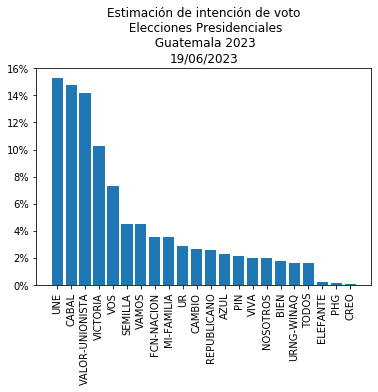

In [31]:
data=df_mi.mean().sort_values(ascending=False)
names = list(data.keys())
values = list(data)

fig, ax = plt.subplots()
ax.set_title('Estimación de intención de voto\n Elecciones Presidenciales\n Guatemala 2023\n'+today)
ax.bar(range(len(data)), values, tick_label=names)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
plt.xticks(rotation=90)
plt.show()

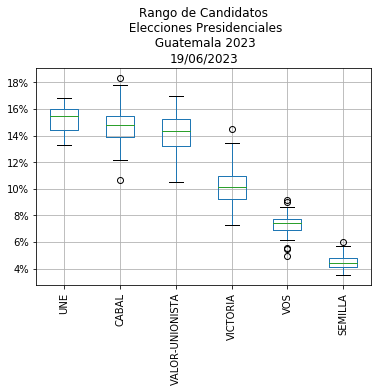

In [32]:
try:
    del df_data
except:
    pass
df_data=df_mi.copy()

ax=df_data[list(data[:6].keys())].boxplot()
plt.title('Rango de Candidatos\n Elecciones Presidenciales\n Guatemala 2023\n'+today)
plt.xticks(rotation = 90)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
plt.show()

In [33]:
means=df_data.mean()
devs=df_data.std()

In [34]:
freq={}
pairs={}

n=10000
for i in range(n):
    sr = pd.Series(index = cols)
    for party in cols:
        sr[party]=np.random.normal(means[party],devs[party],1)[0]
    top=list(sr.sort_values(ascending=False)[:2].keys())
    for p in top:
        try:
            freq[p]+=1
        except:
            freq[p]=1
    try:
        pairs[tuple(top)]+=1
    except:
        pairs[tuple(top)]=1
for party in list(freq.keys()):
    freq[party]=freq[party]/n
for pair in list(pairs.keys()):
    pairs[pair]=pairs[pair]/n

    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [35]:
second=sorted(freq.items(),key=lambda x:x[1], reverse=True)[:]

In [36]:
second

[('UNE', 0.8588),
 ('CABAL', 0.6802),
 ('VALOR-UNIONISTA', 0.4577),
 ('VICTORIA', 0.0033)]

In [37]:
sorted(pairs.items(),key=lambda x:x[1], reverse=True)[:]

[(('UNE', 'CABAL'), 0.2886),
 (('CABAL', 'UNE'), 0.2508),
 (('UNE', 'VALOR-UNIONISTA'), 0.2127),
 (('VALOR-UNIONISTA', 'UNE'), 0.1045),
 (('CABAL', 'VALOR-UNIONISTA'), 0.0837),
 (('VALOR-UNIONISTA', 'CABAL'), 0.0564),
 (('UNE', 'VICTORIA'), 0.002),
 (('CABAL', 'VICTORIA'), 0.0007),
 (('VALOR-UNIONISTA', 'VICTORIA'), 0.0004),
 (('VICTORIA', 'UNE'), 0.0002)]

In [38]:
for pair in pairs.keys():
    print(pair, pairs[pair]+pairs[(pair[1],pair[0])])

('CABAL', 'UNE') 0.5394000000000001
('UNE', 'VALOR-UNIONISTA') 0.3172
('UNE', 'CABAL') 0.5394000000000001
('VALOR-UNIONISTA', 'CABAL') 0.1401
('CABAL', 'VALOR-UNIONISTA') 0.1401
('VALOR-UNIONISTA', 'UNE') 0.3172


KeyError: ('VICTORIA', 'CABAL')

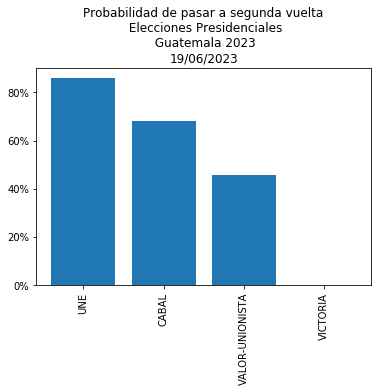

In [39]:
labels=[x[0] for x in second]
values=[x[1] for x in second]

fig, ax = plt.subplots()
ax.bar(range(len(second)), values, tick_label=labels)
ax.set_title('Probabilidad de pasar a segunda vuelta\n Elecciones Presidenciales\n Guatemala 2023\n'+today)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
plt.xticks(rotation=90)
plt.show()

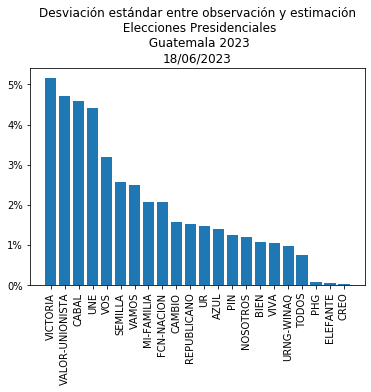

In [16]:
data=df_li.mean().sort_values(ascending=False)
names = list(data.keys())
values = list(data)

fig, ax = plt.subplots()
ax.bar(range(len(data)), values, tick_label=names)
ax.set_title('Desviación estándar entre observación y estimación\n Elecciones Presidenciales\n Guatemala 2023\n'+today)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))



#plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

In [18]:
#Simple Imputation
for party in cols:
    df_svds[party].fillna(value=df_svds[party].mean(), inplace=True)

In [19]:
#df_svd=df_svd.fillna(0)

In [20]:
u, s, v = np.linalg.svd(df_svds, full_matrices=False)


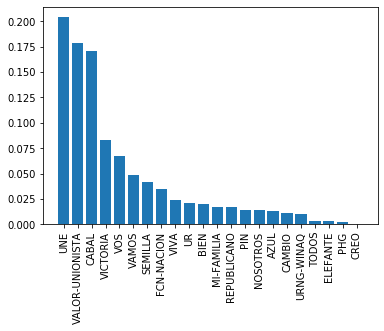

In [21]:
#lower frequency(pca1)
df_comp=pd.DataFrame(np.matrix(u[:1, :1]) * np.diag(s[:1]) * np.matrix(v[:1, :]))
df_comp.columns=cols


data=df_comp.div(df_comp.sum(axis=1), axis=0).mean().sort_values(ascending=False)
names = list(data.keys())
values = list(data)

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

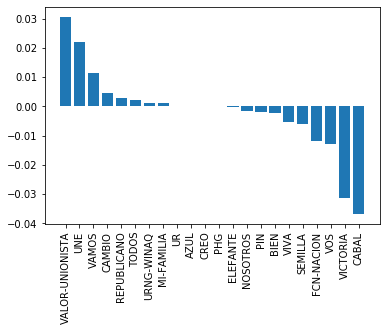

In [22]:
#higher frequency (antipca1)
df_comp=pd.DataFrame(np.matrix(u[1:, 1:]) * np.diag(s[1:]) * np.matrix(v[1:, :]))
df_comp.columns=cols

data=df_comp.div(df_comp.abs().sum(axis=1), axis=0).mean().sort_values(ascending=False)
names = list(data.keys())
values = list(data)

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

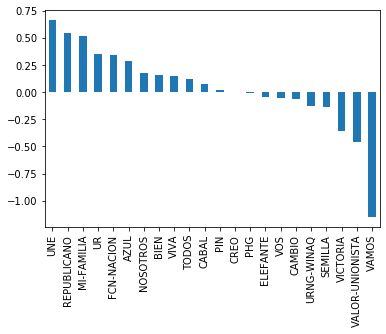

In [45]:
#higher frequency
df_comp=pd.DataFrame(np.matrix(u[2:, 2:]) * np.diag(s[2:]) * np.matrix(v[2:, :]))
df_comp.columns=cols
df_comp.div(df_comp.sum(axis=1), axis=0).mean().sort_values(ascending=False).plot.bar()

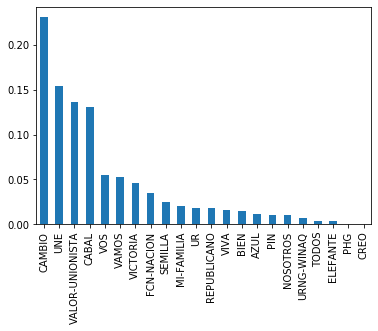

In [46]:
#higher frequency
df_comp=pd.DataFrame(np.matrix(u[:, :2]) * np.diag(s[:2]) * np.matrix(v[:2, :]))
df_comp.columns=cols
df_comp.div(df_comp.sum(axis=1), axis=0).mean().sort_values(ascending=False).plot.bar()

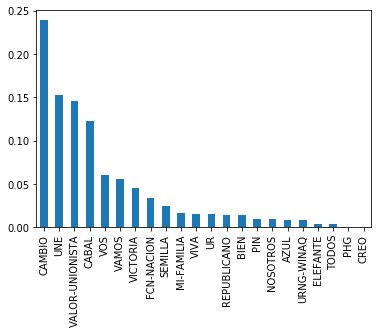

In [47]:
df_comp=pd.DataFrame(np.matrix(u[:, :6]) * np.diag(s[:6]) * np.matrix(v[:6, :]))
df_comp.columns=cols
df_comp.div(df_comp.sum(axis=1), axis=0).mean().sort_values(ascending=False).plot.bar()